In [1]:
import pandas as pd
import nltk
import spacy
import gensim
import seaborn as sb
from gensim import corpora, models, similarities
from spacy.lang.en import English
from nltk.corpus import wordnet as wn

In [2]:
data=pd.read_csv("GuilfordCounty_original_data.csv",)

In [3]:
data.head()

,Unnamed: 0,page_number,word
0,1,2,guilford
1,2,2,county
2,3,2,by
3,4,2,the
4,5,2,numbers


In [4]:
data.drop(data.columns[0], axis=1)

,page_number,word
0,2,guilford
1,2,county
2,2,by
3,2,the
4,2,numbers
5,2,what
6,2,makes
7,2,us
8,2,count
9,2,county


In [5]:
data.describe()

,Unnamed: 0,page_number
count,94559.000000,94559.000000
mean,47280.000000,220.921033
std,27296.976389,133.722968
min,1.000000,2.000000
25%,23640.500000,110.000000
50%,47280.000000,213.000000
75%,70919.500000,324.000000
max,94559.000000,495.000000


In [6]:
#cleaning 
spacy.load('en')
parser=English()
def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.orth_.startswith('http'):
            lda_tokens.append('com')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

In [7]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\messi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
def get_lemma(word):
    lemma=wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma

In [9]:
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

In [10]:
#filtering stopwords
nltk.download('stopwords')
stop=set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\messi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [11]:
#preparing for lda
def prepare_lda(text):
    tokens=tokenize(text)
    tokens=[token for token in tokens if len(token)>4]
    tokens=[token for token in tokens if token not in stop]
    tokens=[get_lemma(token) for token in tokens]
    return tokens

In [12]:
#creating tokens
import random
text_data=[]
with open('GuilfordCounty_original_data.csv') as f:
    for line in f:
        tokens=prepare_lda(line)
        if random.random()>.99:
            print(tokens)
            text_data.append(tokens)

['107",2,"public']
['280",3,"contest']
['489",5,"and']
['492",5,"submitting']
['572",7,"county']
['650",8,"enforcement']
['659",8,"developmental']
['818",9,"technology']
['861",9,"ordinance']
['991",11,"countys']
['1037",11,"unemployed']
['1180",11,"values']
['1256",12,"econom']
['1288",12,"areas']
['1447",12,"the']
['1456",12,"of']
['1547",12,"critical']
['1669",13,"source']
['1683",13,"recommended']
['1752",13,"total']
['1874",13,"i']
['1997",14,"tax']
['2056",14,"non']
['2107",15,"and']
['2199",15,"until']
['2280",15,"revenues']
['2307",15,"period']
['2358",15,"are']
['2425",15,"underlying']
['2570",16,"the']
['2658",16,"sales']
['2738",16,"budget']
['2741",16,"following']
['2847",16,"increase']
['2925",16,"the']
['3005",17,"quality']
['3062",17,"fy']
['3066",17,"fy']
['3131",17,"fy']
['3136",17,"actual']
['3144",17,"s']
['3163",17,"s']
['3186",18,"schools']
['3383",18,"charter']
['3507",18,"is']
['3547",18,"begi']
['3581",18,"guilford']
['3666",18,"trustees']
['3850",19,"crises']
[

['34806",162,"that']
['34983",162,"the']
['35278",163,"in']
['35336",163,"were']
['35375",163,"center']
['35500",164,"calendar']
['35581",164,"deaths']
['35690",164,"to']
['35704",164,"thn']
['35781",164,"expand']
['35952",165,"the']
['35979",165,"and']
['36120",165,"partners']
['36416",169,"to']
['36796",170,"through']
['36878",170,"increased']
['36950",170,"for']
['37061",170,"acuity']
['37165",171,"everexpanding']
['37184",171,"minimize']
['37246",171,"and']
['37274",172,"director']
['37281",172,"safety']
['37599",173,"through']
['37768",173,"impact']
['37814",174,"by']
['37851",174,"planned']
['37911",174,"as']
['38015",174,"secured']
['38112",175,"high']
['38120",175,"the']
['38444",176,"above']
['38886",178,"for']
['38960",178,"ace']
['39008",178,"report']
['39067",179,"next']
['39222",179,"to']
['39328",179,"full']
['39404",180,"inspections']
['39449",180,"overall']
['39479",180,"north']
['39659",181,"equine']
['39665",181,"and']
['39910",182,"local']
['39957",182,"flood']
['401

['73296",339,"card']
['73482",341,"truck']
['73599",343,"capital']
['73778",343,"medical']
['74005",343,"or']
['74214",344,"the']
['74221",344,"are']
['74254",344,"loans']
['74333",344,"active']
['74350",344,"construction']
['74372",344,"new']
['74649",346,"potential']
['74824",347,"estimate']
['75227",348,"study']
['75228",348,"commissioned']
['75229",348,"jointly']
['75239",348,"and']
['75302",348,"of']
['75372",349,"building']
['75387",349,"available']
['75550",350,"funds']
['75680",351,"fy']
['76160",356,"to']
['76279",357,"there']
['76408",358,"street']
['76416",358,"project']
['76457",358,"have']
['76984",360,"animal']
['77014",360,"sources']
['77041",360,"in']
['77158",361,"cip']
['77230",361,"better']
['77254",361,"fy']
['77492",362,"located']
['77502",362,"this']
['77777",364,"and']
['77864",364,"funding']
['77891",364,"positions']
['77929",364,"and']
['77997",365,"county']
['78058",366,"for']
['78275",368,"miscellaneous']
['78287",369,"request']
['78412",369,"funding']
['7846

In [13]:
#creating dictionary
from gensim import corpora
dictionary=corpora.Dictionary(text_data)
corpus= [dictionary.doc2bow(text) for text in text_data]
import pickle 
pickle.dump(corpus, open('corpus.pkl', 'wb'))

In [14]:
#example
ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=6)
for idx, topic in ldamodel.print_topics(-1):
    print('Topic: {} word: {}'.format(idx, topic))

Topic: 0 word: 0.006*"34252",158,"increased" + 0.006*"16086",73,"elimination" + 0.006*"84465",397,"from" + 0.006*"13362",62,"fy" + 0.006*"17035",78,"previously" + 0.006*"89304",459,"fee" + 0.006*"15906",72,"debt" + 0.006*"68693",311,"to" + 0.006*"81015",385,"expense" + 0.006*"79604",376,"urgent"
Topic: 1 word: 0.006*"16200",75,"delayed" + 0.006*"70781",323,"access" + 0.006*"34628",161,"james" + 0.006*"25769",121,"positions" + 0.006*"12921",59,"funding" + 0.006*"1874",13,"i" + 0.006*"11410",47,"uses" + 0.006*"90646",463,"specialist" + 0.006*"11376",47,"to" + 0.006*"43225",196,"officer"
Topic: 2 word: 0.006*"44891",204,"habits" + 0.006*"83336",393,"of" + 0.006*"4146",20,"continue" + 0.006*"79354",374,"funds" + 0.006*"20065",95,"tax" + 0.006*"17871",83,"expenditures" + 0.006*"23880",113,"as" + 0.006*"34144",158,"the" + 0.006*"13138",61,"funding" + 0.006*"47841",216,"natural"
Topic: 3 word: 0.006*"88520",457,"overlay" + 0.006*"43773",200,"water" + 0.006*"63025",279,"as" + 0.006*"85500",409

In [15]:
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

C:\Users\messi\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [20]:
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=ldamodel, texts=text_data, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.8354942193369401


In [23]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [24]:
from gensim.models.ldamodel import LdaModel

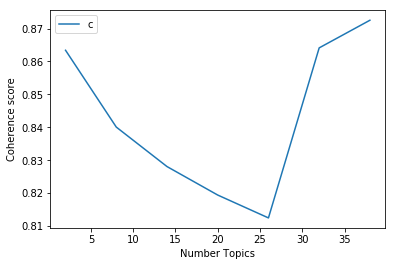

In [25]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=text_data, start=2, limit=40, step=6)
# Graphs shows the optimal number of topics
import matplotlib.pyplot as plt
%matplotlib inline
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()